**Course:** Neural Computing and Deep Learning
---
**Title:** Project 3
---
**Mahdi Mirfendereski - 401131065**
---


# Libraries

In [29]:
import numpy as np
import math
import json
import pandas
import pandas as pd
import matplotlib.pyplot as plt
import sklearn 
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras.utils import plot_model
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import random
import itertools
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from minisom import MiniSom
from pylab import bone, pcolor, colorbar, plot, show

# print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

# Datasets

In [2]:
data = np.load('../Inputs/bunny.npy')
print(data.shape)

(35947, 3)


c:\Users\ASUS\Documents\Extra Courses\ML-DL\env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


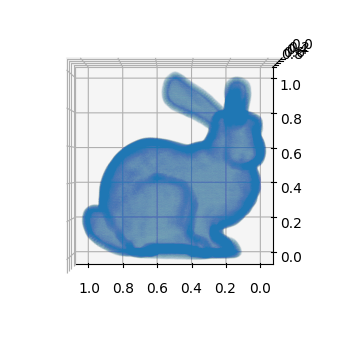

In [3]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x, y, z = data[:, 0], data[:, 1], data[:, 2]
ax.scatter(x, y, z, alpha=0.01)
ax.view_init(-90, 90)
plt.show()

# 1-A) 

In [6]:
def train_som(train_data, out_x, out_y, num_input, sigma, learning_rate, iter, alpha,random_seed, topology='rectangular'):
    som = MiniSom(out_x, out_y, num_input, sigma=sigma, learning_rate=learning_rate, random_seed=1,topology=topology)
    if random_seed == None:
        som.random_weights_init(train_data)
    som.train(train_data, iter) # trains the SOM with 100 iterations
    plt.rcParams["figure.figsize"] = [9.00, 5.0]
    plt.rcParams["figure.autolayout"] = True
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    x = np.reshape(som.get_weights()[:,:,0], out_x * out_y)
    y = np.reshape(som.get_weights()[:,:,1], out_x * out_y)
    z = np.reshape(som.get_weights()[:,:,2], out_x * out_y)
    ax.scatter(x, y, z, alpha=alpha)
    ax.view_init(-90, 90)
    ax.set_title(f'out_layer=({out_x},{out_y}), sigma = {sigma}, learning_rate = {learning_rate}, iter={iter}')
    plt.show()
    som
    return som

c:\Users\ASUS\Documents\Extra Courses\ML-DL\env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


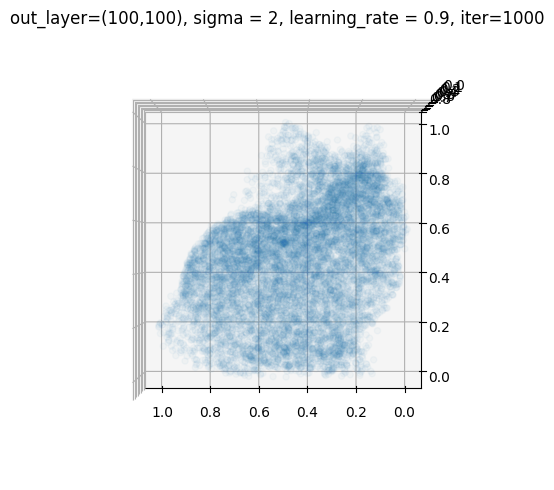

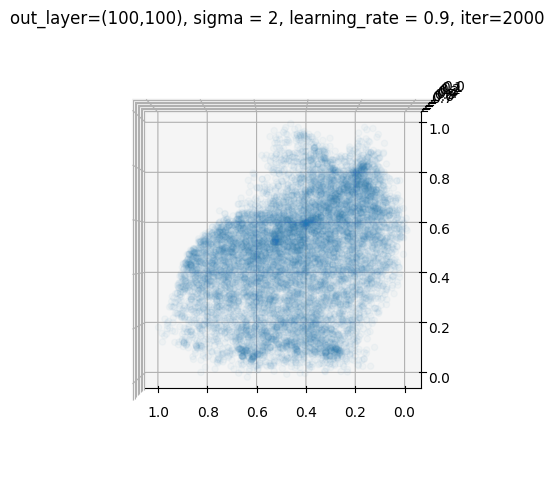

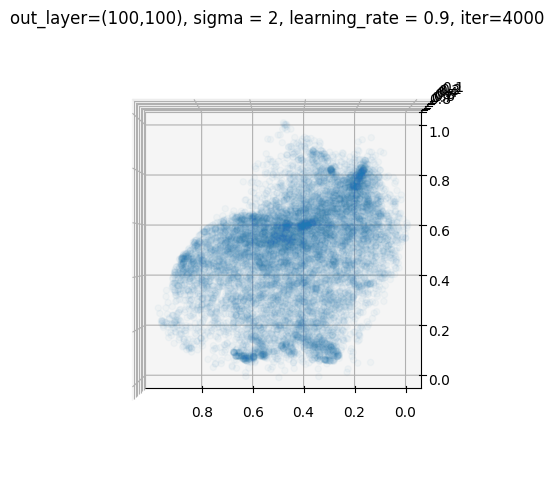

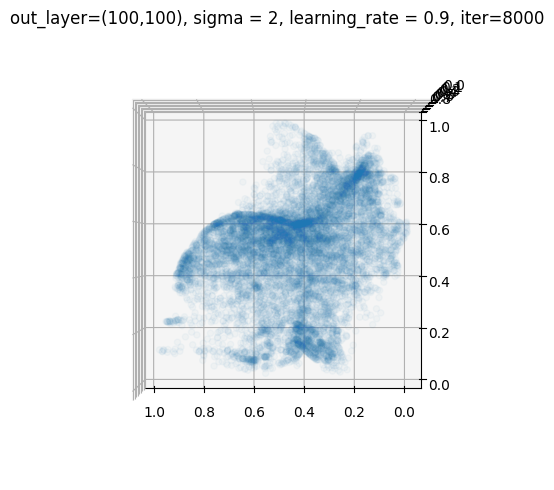

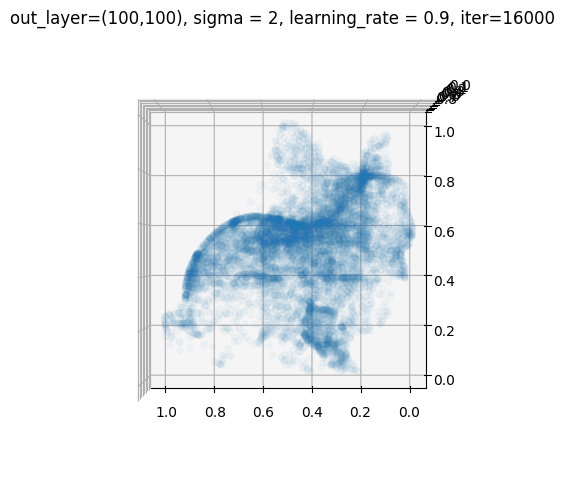

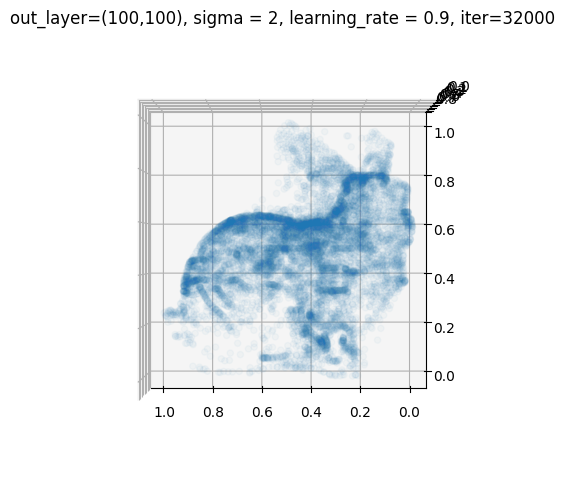

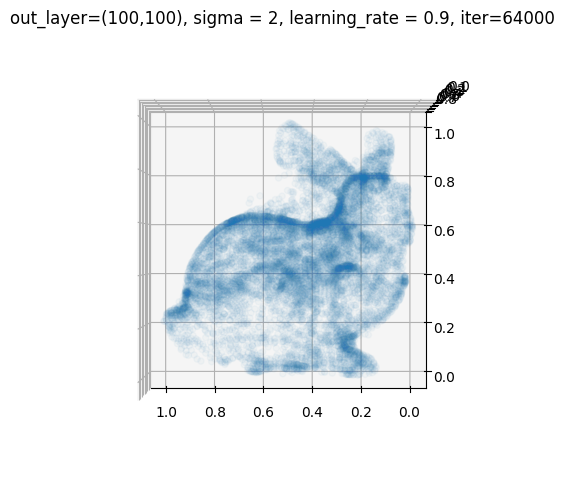

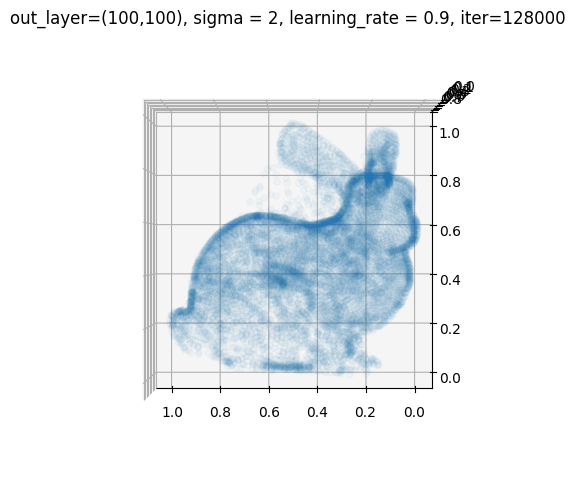

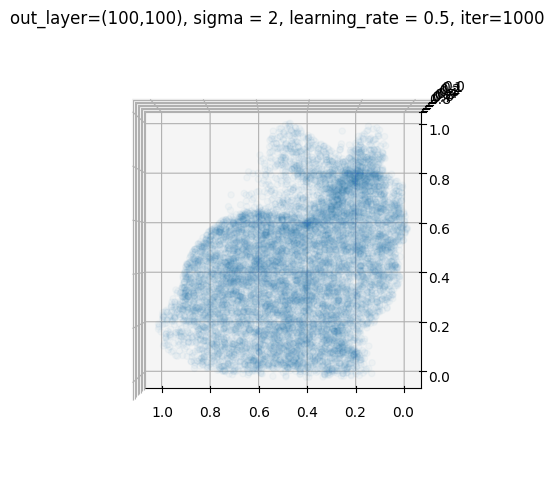

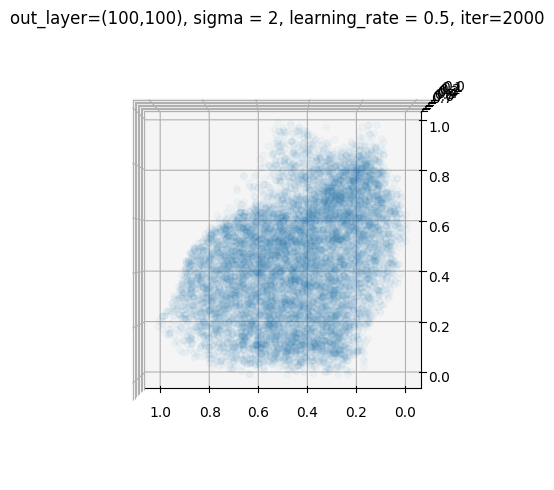

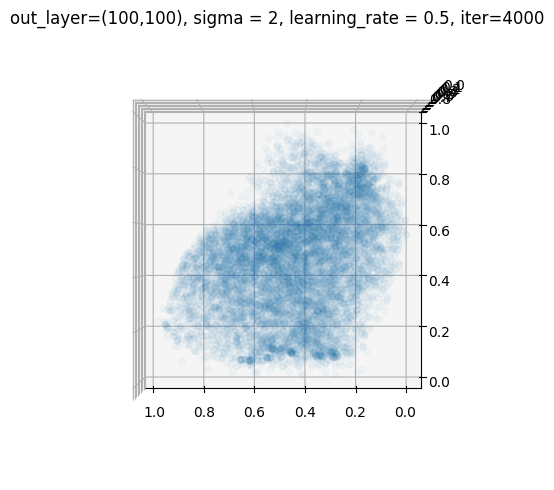

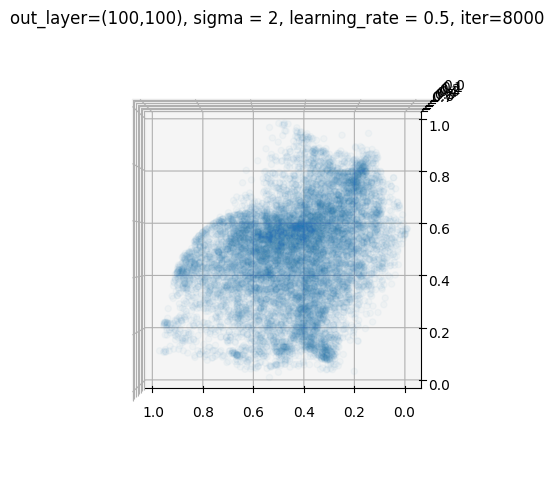

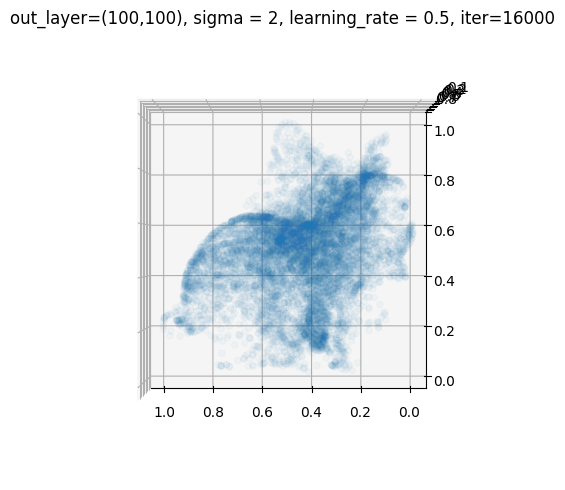

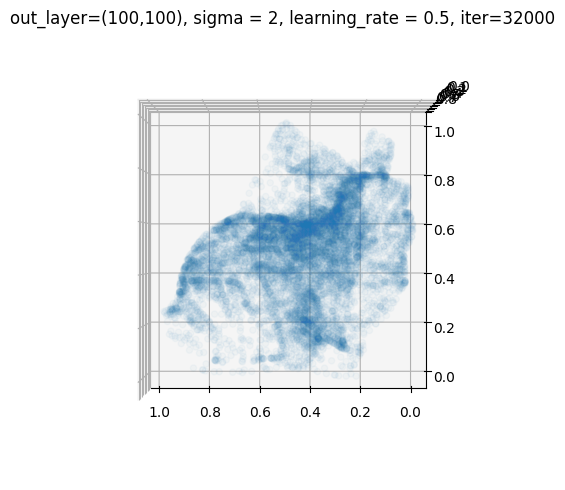

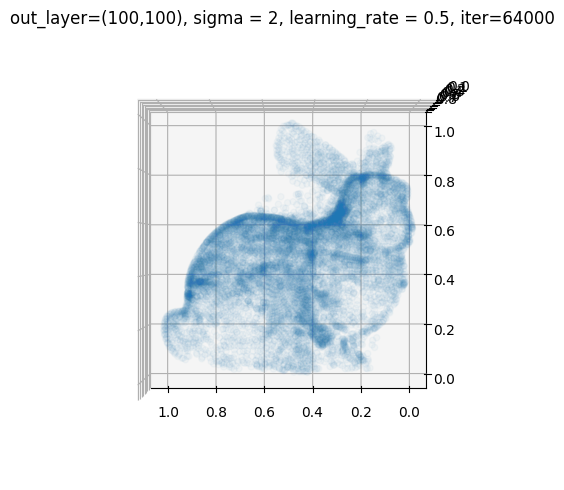

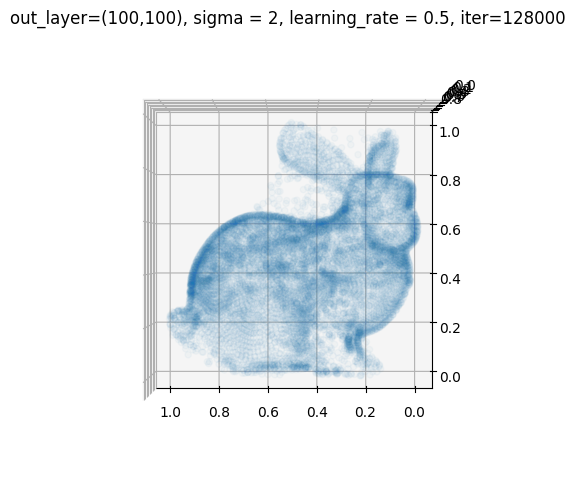

In [9]:
learning_rates = [0.9, 0.5]
iters = [1000, 2000, 4000, 8000, 16000, 32000, 64000, 128000]
for lr in learning_rates:
    for it in iters:
        train_som(train_data=data, out_x=100, out_y=100, num_input=3, sigma=2, learning_rate=lr, iter=it, alpha=0.03, random_seed=None, topology='rectangular')


c:\Users\ASUS\Documents\Extra Courses\ML-DL\env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


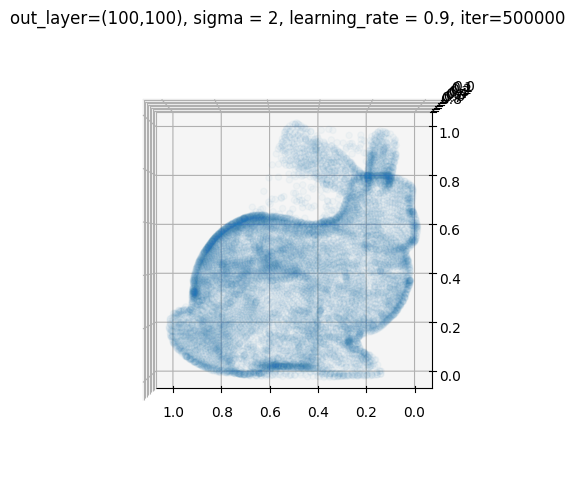

In [10]:
train_som(train_data=data, out_x=100, out_y=100, num_input=3, sigma=2, learning_rate=0.9, iter=500000, alpha=0.03, random_seed=None, topology='rectangular')

# 2-B) 

In [21]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
all_x_data = np.concatenate([x_train, x_test]) 
all_x_data.shape

(70000, 28, 28)

In [263]:
# def train_som_mnist(train_data, out_x, out_y, num_input, sigma, learning_rate, iter, alpha,random_seed, topology='rectangular'):
#     som = MiniSom(out_x, out_y, num_input, sigma=sigma, learning_rate=learning_rate, random_seed=1,topology=topology)
#     if random_seed == None:
#         som.random_weights_init(train_data)
#         print('random_seed == None')
#     som.train(train_data, iter) # trains the SOM with 100 iterations
#     plt.rcParams["figure.figsize"] = [7.00, 3.50]
#     plt.rcParams["figure.autolayout"] = True
#     fig = plt.figure()
#     ax = fig.add_subplot(111, projection='3d')
#     x = np.reshape(som.get_weights()[:,:,0], out_x * out_y)
#     y = np.reshape(som.get_weights()[:,:,1], out_x * out_y)
#     z = np.reshape(som.get_weights()[:,:,2], out_x * out_y)
#     ax.scatter(x, y, z, alpha=alpha)
#     ax.view_init(-90, 90)
#     ax.set_title(f'out_layer=({out_x},{out_y}), sigma = {sigma}, iter={iter}')
#     plt.show()
#     som
#     return som

In [22]:
reshaped_all_x_data = np.reshape(all_x_data,(len(all_x_data),28*28))
reshaped_all_x_data.shape

(70000, 784)

# 2-B) 

c:\Users\ASUS\Documents\Extra Courses\ML-DL\env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


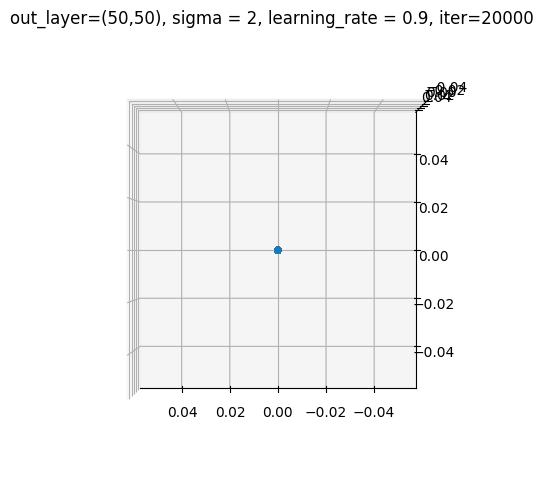

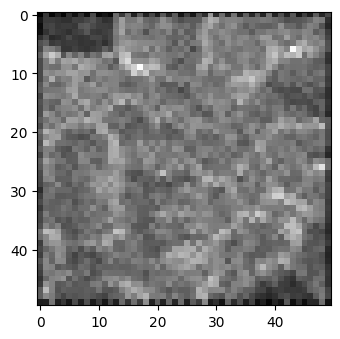

In [23]:
mnist_som = train_som(train_data=reshaped_all_x_data, out_x=50, out_y=50, num_input=28*28, sigma=2, learning_rate=0.9, iter=20000, alpha=0.03, random_seed=None, topology='hexagonal')
u_matrix = mnist_som.distance_map()
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
plt.imshow(u_matrix, cmap='gray')
plt.show()

c:\Users\ASUS\Documents\Extra Courses\ML-DL\env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


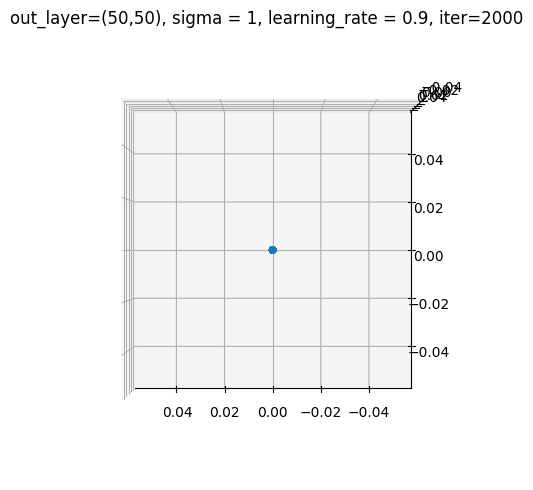

out=(50,50), sigma=1, learning_rate=0.9, iter=2000


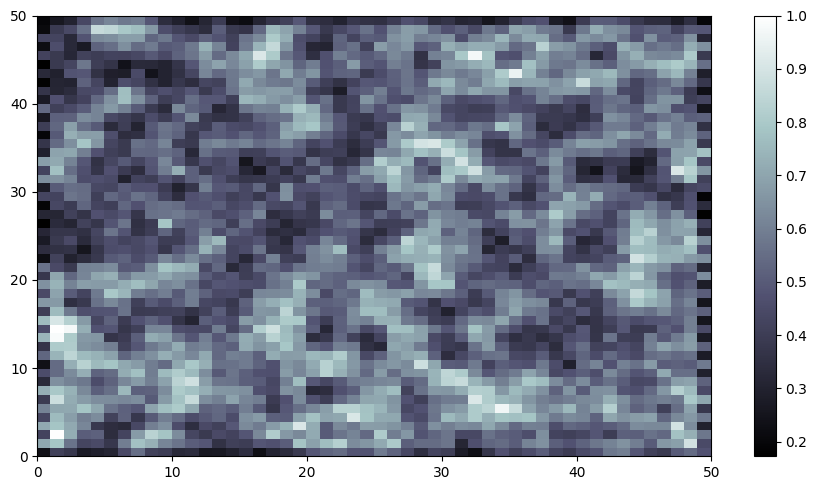

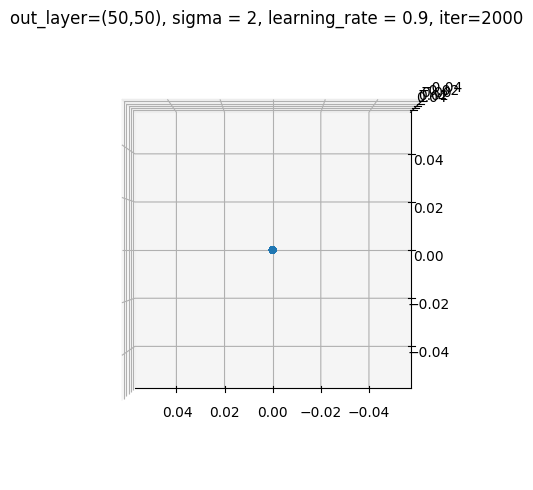

out=(50,50), sigma=2, learning_rate=0.9, iter=2000


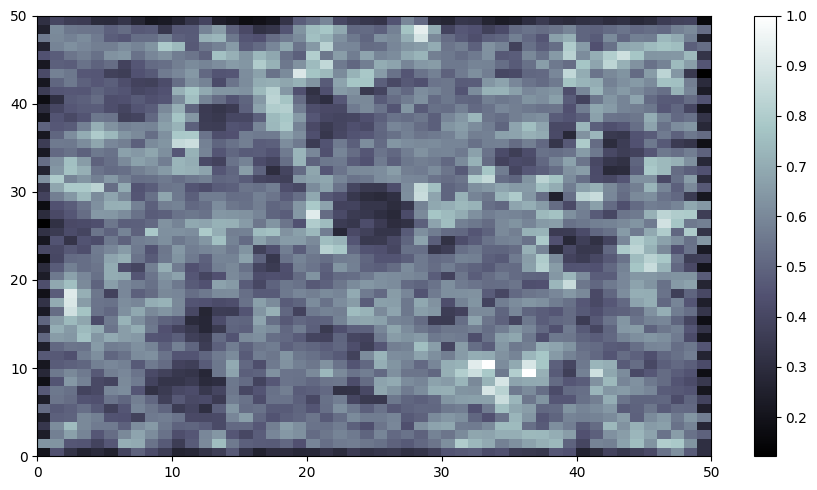

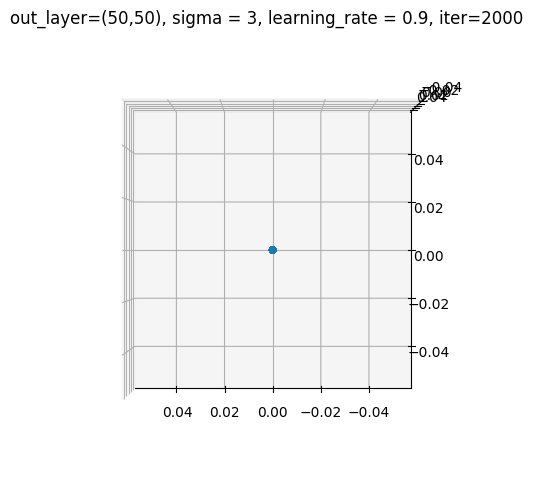

out=(50,50), sigma=3, learning_rate=0.9, iter=2000


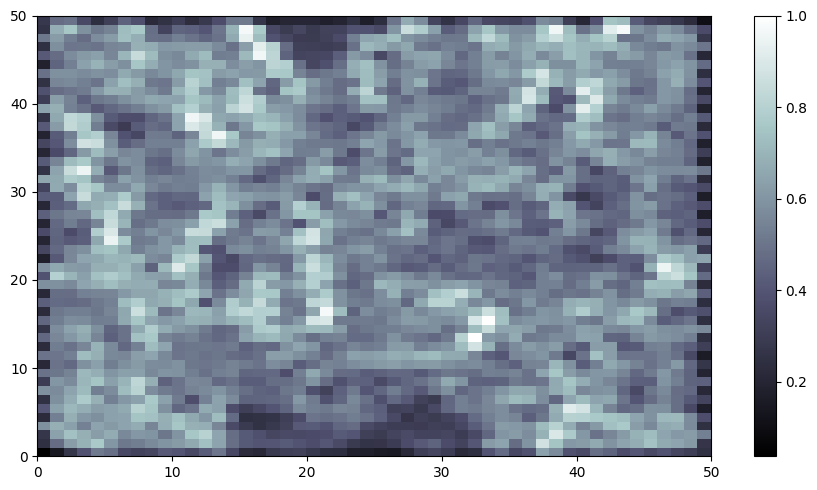

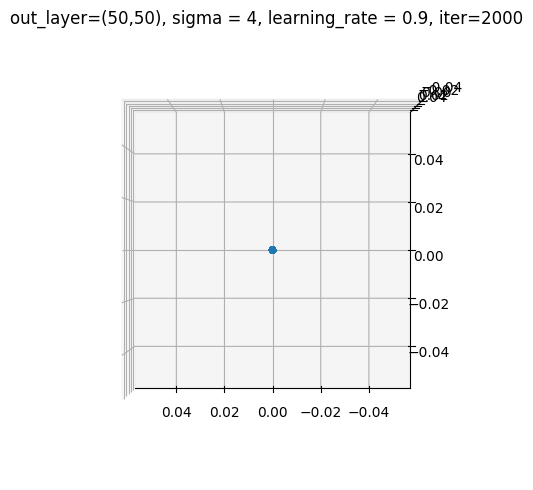

out=(50,50), sigma=4, learning_rate=0.9, iter=2000


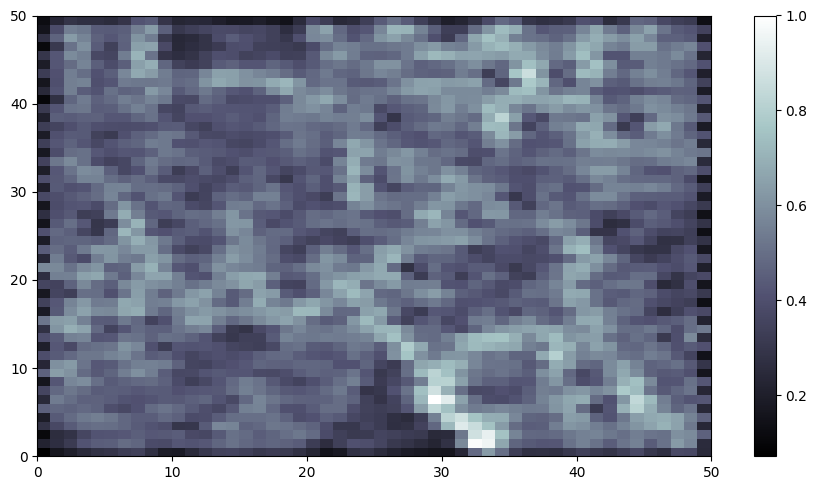

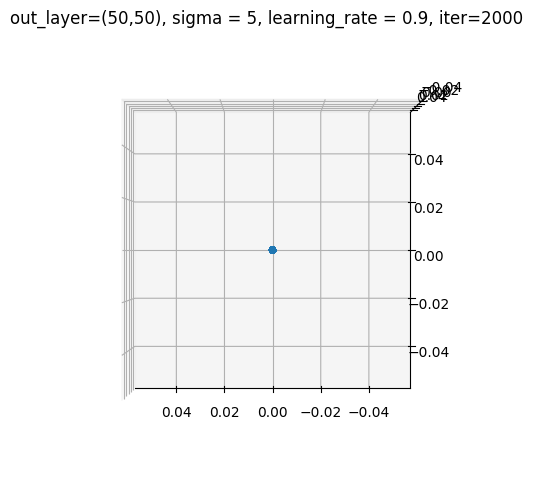

out=(50,50), sigma=5, learning_rate=0.9, iter=2000


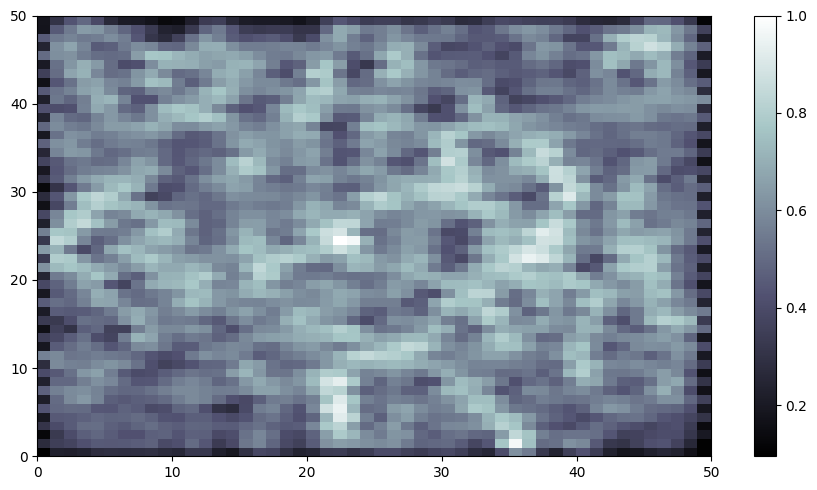

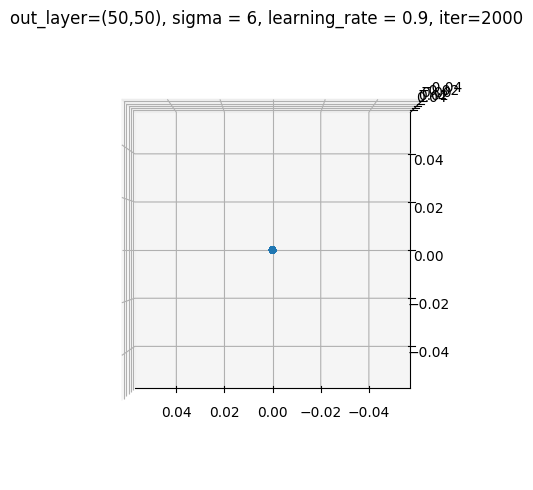

out=(50,50), sigma=6, learning_rate=0.9, iter=2000


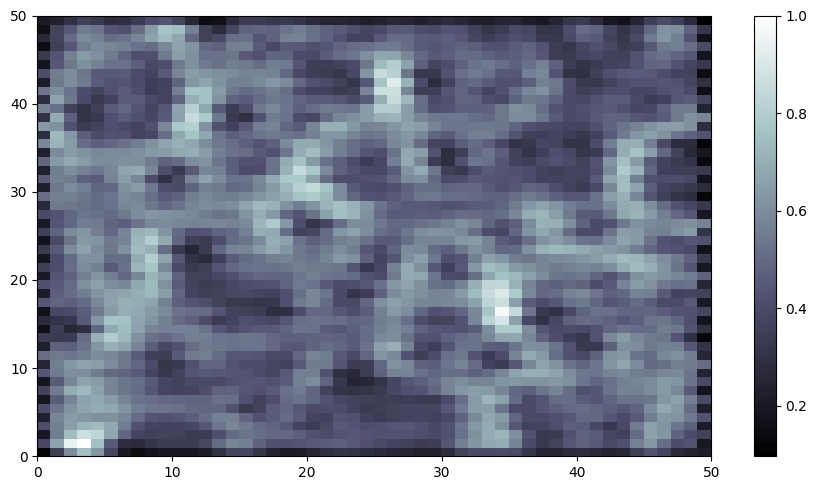

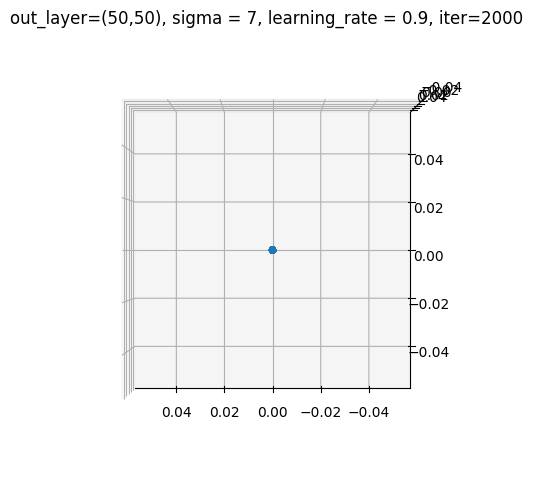

out=(50,50), sigma=7, learning_rate=0.9, iter=2000


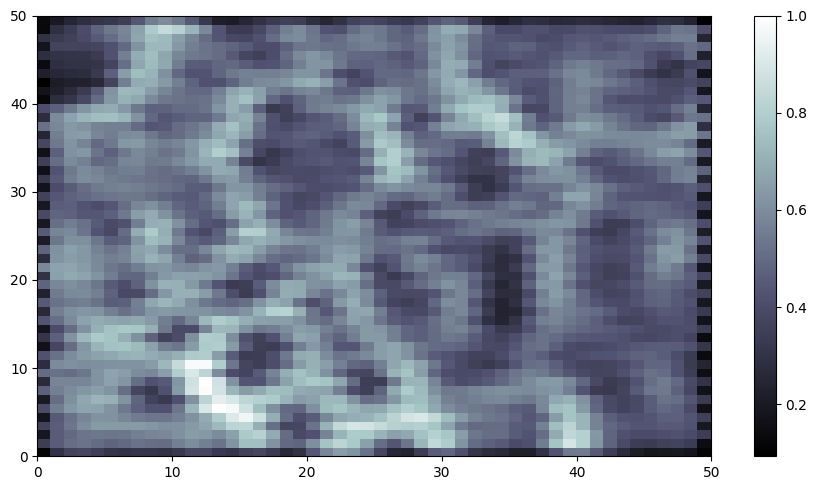

In [59]:
for sig in [1,2,3,4,5,6,7]:
    mnist_som_ = train_som(train_data=reshaped_all_x_data, out_x=50, out_y=50, num_input=28*28, sigma=sig, learning_rate=0.9, iter=2000, alpha=0.03, random_seed=None, topology='hexagonal')
    u_matrix = mnist_som_.distance_map()
    print(f'out=(50,50), sigma={sig}, learning_rate=0.9, iter=2000')
    bone()
    pcolor(u_matrix.T) # plotting the distance map as background
    colorbar()

# 2-D) 

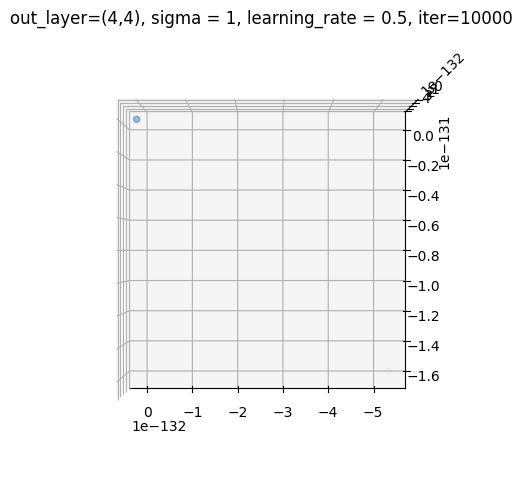

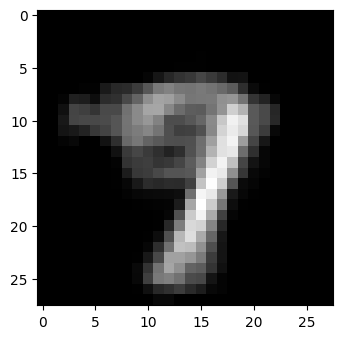

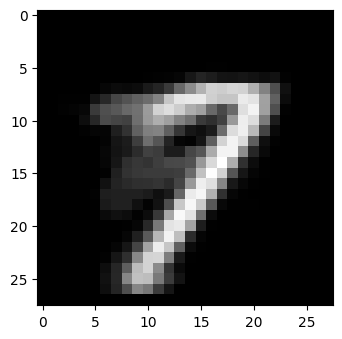

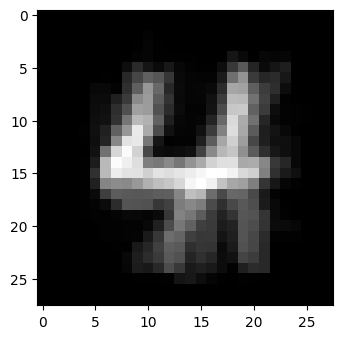

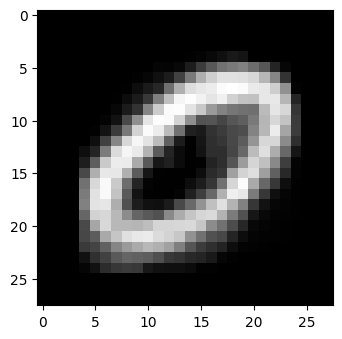

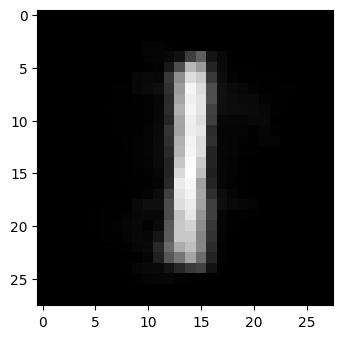

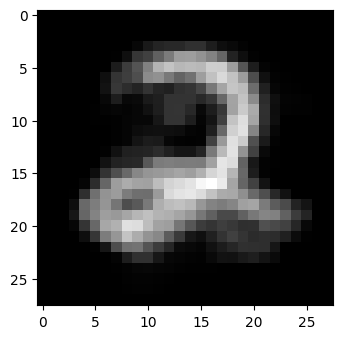

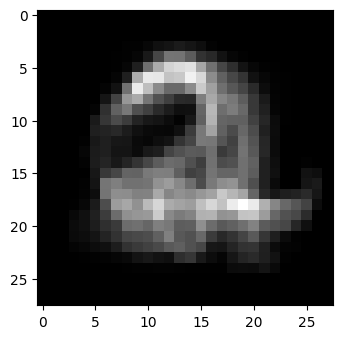

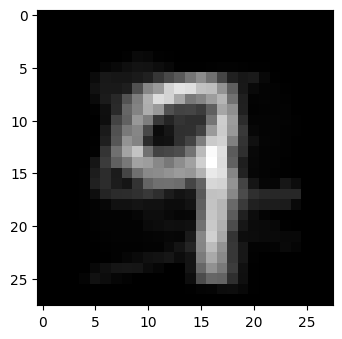

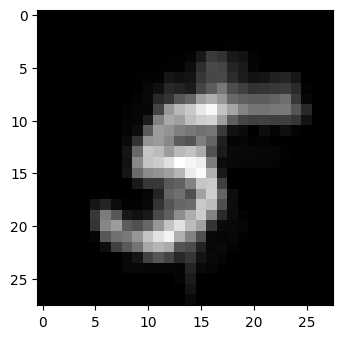

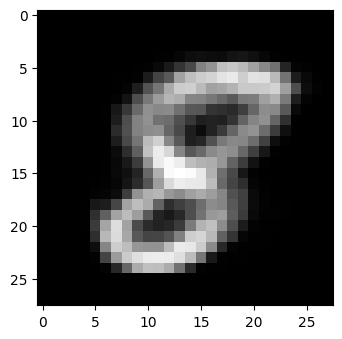

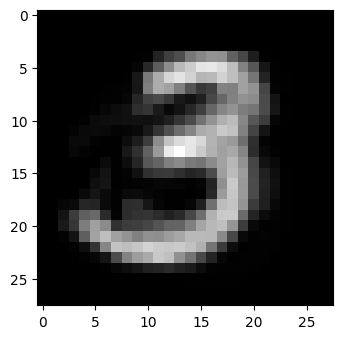

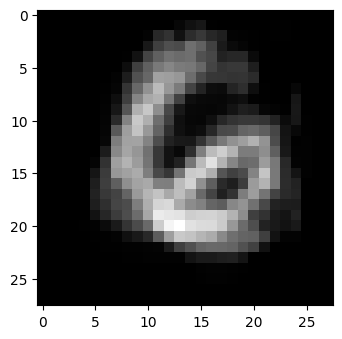

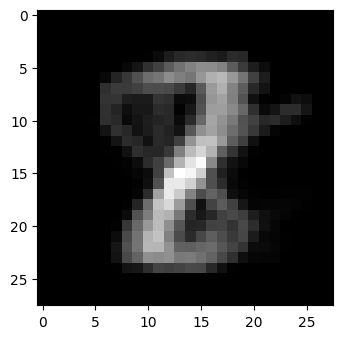

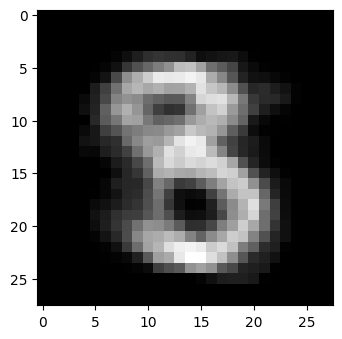

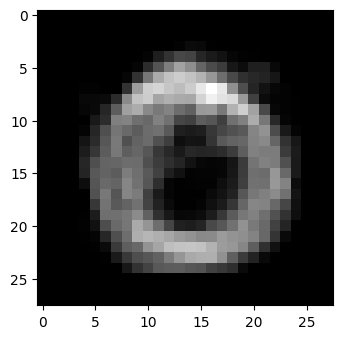

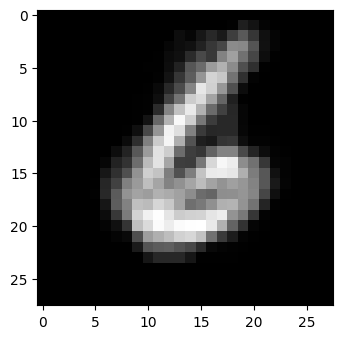

In [57]:
mnist_som_d = train_som(train_data=reshaped_all_x_data, out_x=4, out_y=4, num_input=28*28, sigma=1, learning_rate=0.5, iter=10000, alpha=0.03, random_seed=1, topology='hexagonal')
for i in range(4):
    for j in range(4):    
        test = np.reshape(mnist_som_d.get_weights()[i][j],(28,28))
        plt.rcParams["figure.figsize"] = [7.00, 3.50]
        plt.rcParams["figure.autolayout"] = True
        plt.imshow(test, cmap='gray')
        plt.show()

out=(50,50), sigma=7, learning_rate=0.9, iter=2000


c:\Users\ASUS\Documents\Extra Courses\ML-DL\env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


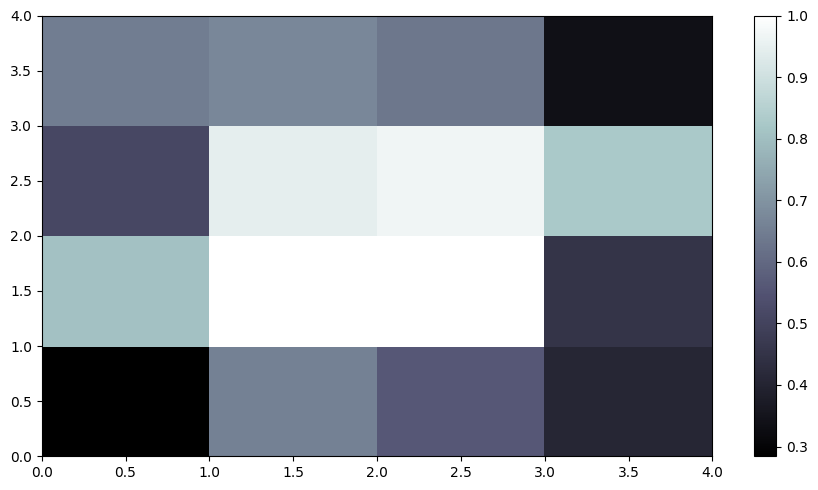

In [60]:
u_matrix = mnist_som_d.distance_map()
print(f'out=(50,50), sigma={sig}, learning_rate=0.9, iter=2000')
bone()
pcolor(u_matrix.T) # plotting the distance map as background
colorbar()